# 05 - Model Analysis

## 1. Load Data and Model
We use the best model selected previously and evaluate it on the test set.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
sys.path.append('..')
from src.modeling import evaluate_model_with_threshold

df = pd.read_csv('../data/processed/credit_card_default_processed.csv')
X = df.drop('default_payment', axis=1)
y = df['default_payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 2. Evaluate Best Model
Assume Random Forest was selected (update if Logistic Regression was better).


In [2]:
# Load and evaluate logistic regression model
from src.utils import load_model

# Load the trained logistic regression model
lr_model = load_model('best_logistic_regression.joblib')

evaluate_model_with_threshold(lr_model, X_test, y_test, 'Logistic Regression')


Logistic Regression Optimal Threshold: 0.538

Logistic Regression Performance (Default Threshold = 0.5):
Accuracy: 0.77
Precision: 0.48
Recall: 0.58
F1-Score: 0.52
AUC-ROC: 0.75
Confusion Matrix:
 [[3825  848]
 [ 566  761]]

Logistic Regression Performance (Optimal Threshold = 0.54):
Accuracy: 0.78
Precision: 0.5
Recall: 0.56
F1-Score: 0.53
AUC-ROC: 0.75
Confusion Matrix:
 [[3914  759]
 [ 587  740]]


C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
# Load and evaluate random forest model
rf_model = load_model('best_random_forest.joblib')

evaluate_model_with_threshold(rf_model, X_test, y_test, 'Random Forest')


Random Forest Optimal Threshold: 0.526

Random Forest Performance (Default Threshold = 0.5):
Accuracy: 0.78
Precision: 0.51
Recall: 0.58
F1-Score: 0.54
AUC-ROC: 0.78
Confusion Matrix:
 [[3915  758]
 [ 566  761]]

Random Forest Performance (Optimal Threshold = 0.53):
Accuracy: 0.79
Precision: 0.53
Recall: 0.56
F1-Score: 0.55
AUC-ROC: 0.78
Confusion Matrix:
 [[3998  675]
 [ 586  741]]


C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
# Load and evaluate random forest model
dt_model = load_model('best_decision_tree.joblib')

evaluate_model_with_threshold(dt_model, X_test, y_test, 'Decision Tree')


Decision Tree Optimal Threshold: 0.624

Decision Tree Performance (Default Threshold = 0.5):
Accuracy: 0.78
Precision: 0.5
Recall: 0.55
F1-Score: 0.52
AUC-ROC: 0.76
Confusion Matrix:
 [[3918  755]
 [ 600  727]]

Decision Tree Performance (Optimal Threshold = 0.62):
Accuracy: 0.79
Precision: 0.51
Recall: 0.55
F1-Score: 0.53
AUC-ROC: 0.76
Confusion Matrix:
 [[3968  705]
 [ 606  721]]


In [10]:
# Load and evaluate random forest model
knn_model = load_model('best_knn.joblib')

evaluate_model_with_threshold(knn_model, X_test, y_test, 'KNN')


KNN Optimal Threshold: 0.171

KNN Performance (Default Threshold = 0.5):
Accuracy: 0.76
Precision: 0.4
Recall: 0.16
F1-Score: 0.23
AUC-ROC: 0.62
Confusion Matrix:
 [[4342  331]
 [1115  212]]

KNN Performance (Optimal Threshold = 0.17):
Accuracy: 0.59
Precision: 0.3
Recall: 0.61
F1-Score: 0.4
AUC-ROC: 0.62
Confusion Matrix:
 [[2716 1957]
 [ 520  807]]


In [12]:
# Compare models and select the best one
if (rf_model.score(X_test, y_test) >= lr_model.score(X_test, y_test) and
    rf_model.score(X_test, y_test) >= knn_model.score(X_test, y_test) and
    rf_model.score(X_test, y_test) >= dt_model.score(X_test, y_test)):
    best_model = rf_model
    print("Random Forest selected as best model")
elif (lr_model.score(X_test, y_test) >= rf_model.score(X_test, y_test) and
      lr_model.score(X_test, y_test) >= knn_model.score(X_test, y_test) and
      lr_model.score(X_test, y_test) >= dt_model.score(X_test, y_test)):
    best_model = lr_model
    print("Logistic Regression selected as best model")
elif (knn_model.score(X_test, y_test) >= rf_model.score(X_test, y_test) and
      knn_model.score(X_test, y_test) >= lr_model.score(X_test, y_test) and
      knn_model.score(X_test, y_test) >= dt_model.score(X_test, y_test)):
    best_model = knn_model
    print("K-Nearest Neighbors selected as best model")
else:
    best_model = dt_model
    print("Decision Tree selected as best model")

Random Forest selected as best model


### ROC curve

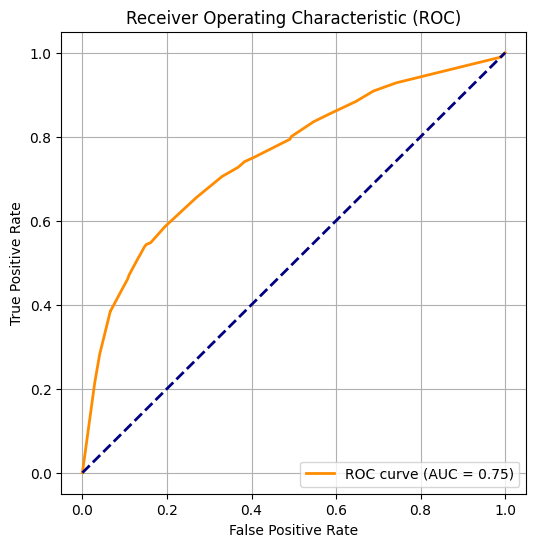

In [13]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities from best model
y_scores = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


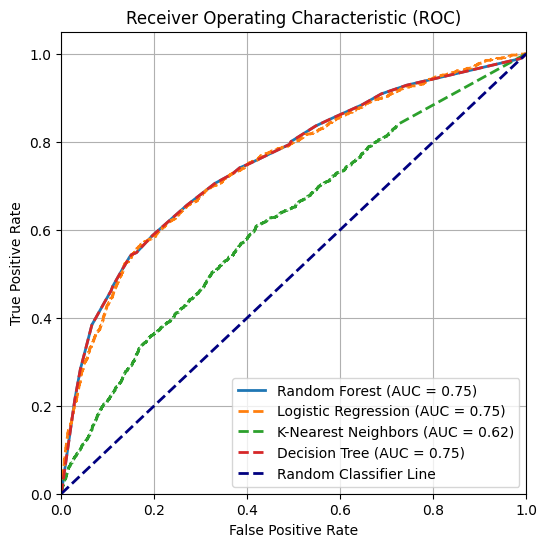

In [14]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume these are your trained models (replace with actual model objects)
models = {
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'K-Nearest Neighbors': knn_model,
    'Decision Tree': dt_model
}

# Dictionary to store ROC data
roc_data = {}
for name, model in models.items():
    # Get predicted probabilities (use [:, 1] for binary classification)
    if hasattr(model, 'predict_proba'):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.predict(X_test)  # Fallback for models without predict_proba
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Find the best model based on AUC
best_model_name = max(roc_data, key=lambda x: roc_data[x]['auc'])
best_model_auc = roc_data[best_model_name]['auc']

# Plot ROC curves
plt.figure(figsize=(6, 6))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.2f})', 
             lw=2, linestyle='--' if name != best_model_name else '-')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier Line')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_auc_score
import sys
sys.path.append('..')

from src.utils import save_model

# Assume these are your trained models
models = {
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'K-Nearest Neighbors': knn_model,
    'Decision Tree': dt_model
}

# Function to compute metrics
def compute_metrics(y_true, y_pred, y_pred_proba=None):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', pos_label=1)
    roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1]) if y_pred_proba is not None else None
    return {
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
        'Accuracy': (tp + tn) / (tp + tn + fp + fn),
        'Precision': precision, 'Recall': recall, 'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Compute metrics for each model
results = {}
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
        y_pred = model.predict(X_test)
    else:
        y_pred_proba = None
        y_pred = model.predict(X_test)
    results[name] = compute_metrics(y_test, y_pred, y_pred_proba)

# 1. Confusion Matrix Summary Table
conf_matrix_df = pd.DataFrame({
    'Model': list(models.keys()),
    'TP': [results[m]['TP'] for m in models.keys()],
    'TN': [results[m]['TN'] for m in models.keys()],
    'FP': [results[m]['FP'] for m in models.keys()],
    'FN': [results[m]['FN'] for m in models.keys()]
})
print("\nConfusion Matrix Summary Table:")
print(conf_matrix_df.to_string(index=False))

# 2. Detailed Performance Metrics Table
perf_metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in models.keys()],
    'Precision': [results[m]['Precision'] for m in models.keys()],
    'Recall': [results[m]['Recall'] for m in models.keys()],
    'F1-Score': [results[m]['F1-Score'] for m in models.keys()],
    'ROC-AUC': [results[m]['ROC-AUC'] for m in models.keys()]
})
print("\nDetailed Performance Metrics Table:")
print(perf_metrics_df.round(4).to_string(index=False))

# 3. Per-Class Performance Table (for binary classification)
per_class_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Class 0 Precision': [precision_recall_fscore_support(y_test, models[m].predict(X_test), average=None)[0][0] for m in models.keys()],
    'Class 0 Recall': [precision_recall_fscore_support(y_test, models[m].predict(X_test), average=None)[1][0] for m in models.keys()],
    'Class 0 F1': [precision_recall_fscore_support(y_test, models[m].predict(X_test), average=None)[2][0] for m in models.keys()],
    'Class 1 Precision': [precision_recall_fscore_support(y_test, models[m].predict(X_test), average=None)[0][1] for m in models.keys()],
    'Class 1 Recall': [precision_recall_fscore_support(y_test, models[m].predict(X_test), average=None)[1][1] for m in models.keys()],
    'Class 1 F1': [precision_recall_fscore_support(y_test, models[m].predict(X_test), average=None)[2][1] for m in models.keys()]
})
print("\nPer-Class Performance Table:")
print(per_class_df.round(4).to_string(index=False))

# 4. Cross-Validation Performance Table (assuming cross_validate_model is available)
from src.modeling import cross_validate_model
cv_results = {}
for name, model in models.items():
    cv_scores = cross_validate_model(model, X_train, y_train, cv=5, scoring='roc_auc')
    cv_results[name] = {'Mean CV ROC-AUC': cv_scores.mean(), 'Std CV ROC-AUC': cv_scores.std()}

cv_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Mean CV ROC-AUC': [cv_results[m]['Mean CV ROC-AUC'] for m in models.keys()],
    'Std CV ROC-AUC': [cv_results[m]['Std CV ROC-AUC'] for m in models.keys()]
})
print("\nCross-Validation Performance Table:")
print(cv_df.round(4).to_string(index=False))

# Select and save the best model (using your original logic)
if (rf_model.score(X_test, y_test) > lr_model.score(X_test, y_test) and
    rf_model.score(X_test, y_test) > knn_model.score(X_test, y_test) and
    rf_model.score(X_test, y_test) > dt_model.score(X_test, y_test)):
    best_model = rf_model
    best_model_name = 'Random Forest'
    print("\nRandom Forest selected as best model")
elif (lr_model.score(X_test, y_test) > rf_model.score(X_test, y_test) and
      lr_model.score(X_test, y_test) > knn_model.score(X_test, y_test) and
      lr_model.score(X_test, y_test) > dt_model.score(X_test, y_test)):
    best_model = lr_model
    best_model_name = 'Logistic Regression'
    print("\nLogistic Regression selected as best model")
elif (knn_model.score(X_test, y_test) > rf_model.score(X_test, y_test) and
      knn_model.score(X_test, y_test) > lr_model.score(X_test, y_test) and
      knn_model.score(X_test, y_test) > dt_model.score(X_test, y_test)):
    best_model = knn_model
    best_model_name = 'K-Nearest Neighbors'
    print("\nK-Nearest Neighbors selected as best model")
else:
    best_model = dt_model
    best_model_name = 'Decision Tree'
    print("\nDecision Tree selected as best model")

save_model(best_model, f'best_{best_model_name.lower().replace(" ", "_")}.joblib')


Confusion Matrix Summary Table:
              Model  TP   TN  FP   FN
      Random Forest 727 3918 755  600
Logistic Regression 761 3825 848  566
K-Nearest Neighbors 212 4342 331 1115
      Decision Tree 727 3918 755  600

Detailed Performance Metrics Table:
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
      Random Forest    0.7742     0.4906  0.5479    0.5176   0.7529
Logistic Regression    0.7643     0.4730  0.5735    0.5184   0.7498
K-Nearest Neighbors    0.7590     0.3904  0.1598    0.2267   0.6175
      Decision Tree    0.7742     0.4906  0.5479    0.5176   0.7529

Per-Class Performance Table:
              Model  Class 0 Precision  Class 0 Recall  Class 0 F1  Class 1 Precision  Class 1 Recall  Class 1 F1
      Random Forest             0.8672          0.8384      0.8526             0.4906          0.5479      0.5176
Logistic Regression             0.8711          0.8185      0.8440             0.4730          0.5735      0.5184
K-Nearest Neighbors         

## 3. Feature Importance (if Random Forest)
Visualize the most important features for prediction.


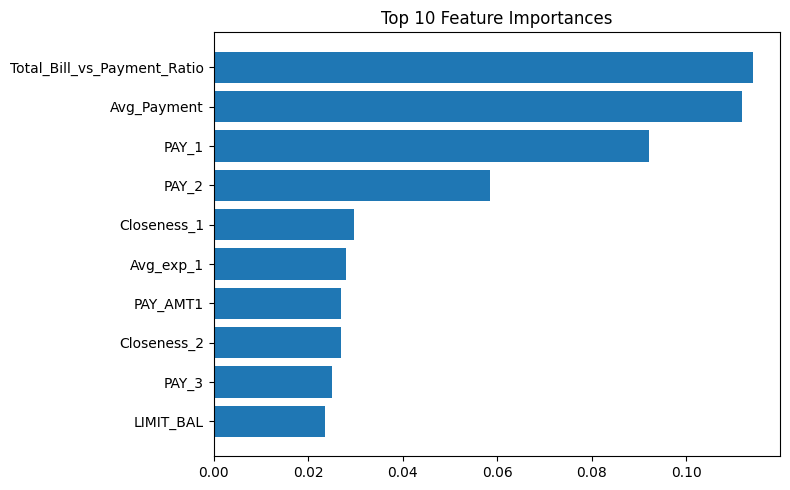

In [6]:
import matplotlib.pyplot as plt
import numpy as np
feature_importances = best_model.feature_importances_
indices = np.argsort(feature_importances)[-10:]  # Get top 10 features
plt.figure(figsize=(8,5))
plt.title('Top 10 Feature Importances')
plt.barh(range(10), feature_importances[indices], align='center')  # Plot in ascending order
plt.yticks(range(10), X.columns[indices])  # Labels match the values
plt.tight_layout()
plt.show()

## 4. Conclusion:
- Achievements: Built a predictive model with advanced feature engineering, reduced dimensionality, and evaluated performance with appropriate metrics.
- Next Steps:
  - Experiment with advanced models like XGBoost.
  - Implement a K-S chart for probability calibration.
  - Deploy the Random Forest model for risk assessment, with Logistic Regression as a fallback for interpretability.